# Tutorial for `Group.py`
This folder contains an extension of the [absalg](https://github.com/naftaliharris/Abstract-Algebra) library by [Naftali Harris](http://www.naftaliharris.com).

We start by loading the library

In [1]:
%pylab inline 
#we will do some drawing at the end...
from Group import *

Populating the interactive namespace from numpy and matplotlib


## Defining a group
Let us define a group from scratch. We need a set and a binary operation.

In [2]:
S=Set(range(5))
b_op=Function(S.cartesian(S),S,lambda x: (x[0]+x[1])%5)
G=Group(S,b_op)

We can, for instance, list the elements in `G`. Observe that this is just a representation of them.

In [3]:
list(G)

[0, 1, 2, 3, 4]

This does not mean that 1 is in `G`.

In [4]:
1 in G

False

In order to see 1 in `G`, we need to create an instance of it as element in `G`. And then, we can operate with it.

In [5]:
one=G(1)
one*one

2

As in this case, `G` is abelian, we can even perform the last operation by using `+`.

In [6]:
one+one

2

Also, in this case powers become multiples.

In [7]:
one**3==3*one

True

The Cayley table of `G` can be calculated as follows (multiplicative table).

In [8]:
G.table()

*,0,1,2,3,4
0,0,1,2,3,4
1,1,2,3,4,0
2,2,3,4,0,1
3,3,4,0,1,2
4,4,0,1,2,3


In [9]:
Set([i*one for i in range(10)])

frozenset({0, 1, 3, 2, 4})

We can indeed do this last operation by considering the group spanned by `one`; which in this case is `G` itself.

In [10]:
H=G.generate([one])
H==G

True

This means that this group is *cyclic*.

In [11]:
G.is_cyclic()

True

The inverse of an element can be compute in several ways. 

In [12]:
[G.inverse(one), one**-1]

[4, 4]

We can compute the lattice of subgroups of `G`.

In [13]:
subgs=G.subgroups()

In [14]:
[list(i) for i in subgs]

[[0], [0, 1, 2, 3, 4]]

Since `G` is abelian, all its subgroups are normal.

In [15]:
all(H.is_normal_subgroup(G) for H in subgs)

<generator object <genexpr> at 0x108673320>

Indeed groups as `G` are quite common, this is why we dedided to write an specific function to define them: `CyclicGroup`. We will talk later more about it. 

The function `CyclicGroup(n)` returns (as defaul) the group $(\mathbb{Z}_n,+)$.

In [16]:
G.is_isomorphic(CyclicGroup(5))

True

## Cartesian product and quotients
A way to obtain groups from others is by computing cartesian products, or quotients by normal subgroups.

Let us, for instance, compute `G^2`

In [17]:
G2=G.cartesian(G)

The elements of `G2` are tuples. We can as above, instanciate one of its elements.

In [18]:
one2=G2((1,1))

We can define the cyclic group generated by `one2`, and check that indeed is a subgroup of `G2`.

In [19]:
H=G2.generate([one2])
H<=G2

True

Contrary to what happened above, in this case `H` is not `G2` itself; this is due to the fact that `G2` is no longer cyclic. Let us compute a system of generators of `G2`.

In [20]:
H==G2

False

In [21]:
G2.is_cyclic()

False

In [22]:
G2.generators()

[(1, 3), (1, 2)]

We already know that every subgroup of an abelian group is normal, and so we can compute the quotient of `G2` by `H`.

In [23]:
G2/H

Group with 5 elements

Its elements are congruency classes, and this is why when listing them, we get a lists of sets.

In [24]:
Q=G2/H
list(Q)

[Set([(2, 2), (4, 4), (3, 3), (0, 0), (1, 1)]),
 Set([(3, 0), (1, 3), (4, 1), (2, 4), (0, 2)]),
 Set([(4, 3), (3, 2), (1, 0), (2, 1), (0, 4)]),
 Set([(4, 2), (0, 3), (3, 1), (1, 4), (2, 0)]),
 Set([(0, 1), (3, 4), (1, 2), (2, 3), (4, 0)])]

In [25]:
Q.is_abelian()

True

In [26]:
Q.is_cyclic()

True

In [27]:
[list(J) for J in G2.subgroups()]

[[(0, 0), (3, 0), (2, 0), (1, 0), (4, 0)],
 [(0, 0), (2, 3), (3, 2), (4, 1), (1, 4)],
 [(0, 0), (0, 1), (0, 3), (0, 2), (0, 4)],
 [(0, 0)],
 [(0, 0),
  (1, 3),
  (3, 0),
  (2, 1),
  (0, 3),
  (4, 0),
  (1, 2),
  (3, 3),
  (4, 4),
  (2, 2),
  (4, 1),
  (1, 1),
  (3, 2),
  (0, 4),
  (1, 4),
  (2, 3),
  (4, 2),
  (1, 0),
  (0, 1),
  (3, 1),
  (0, 2),
  (2, 0),
  (4, 3),
  (3, 4),
  (2, 4)],
 [(0, 0), (4, 2), (1, 3), (3, 4), (2, 1)],
 [(0, 0), (2, 2), (1, 1), (4, 4), (3, 3)],
 [(0, 0), (1, 2), (3, 1), (2, 4), (4, 3)]]

## Permutations

Permutations are a fundamental tool for the study of groups. Indeed permutations (bijective maps) of the set $\{1,\ldots,n\}$ under composition are a group that is not abelian for $n\ge 3$.

We have included a bunch of ways to define a permuation with the class `permutation`.

- `permutation(list of integers)` creates a permutation in which the $i$ goes to the $i$th elmeent in the given list of integers.

- `permutation(sequence of integers)` does the same as above, by considering the sequence as a list.

- `permutation(sequence of tuples)` creates a permutation that is the product of the given tuples, by considering the tuples as cycles.

- `permutation(list of tuples)` does the same as in the preceding case.


In [28]:
permutation(2,3,1,4)==permutation([2,3,1,4])

True

In [29]:
permutation((1,2),(3,4))==permutation([(1,2),(3,4)])

True

Composition of permutations is performed by using the `*` operator; powers with `**`.

In [30]:
p=permutation((1,2),(3,4))
p*p

( )

You may gues from the above output that we are displaying the identity map just by `( )`. Permutations are displayed as a product of disjoint cycles, and printed both in matrix representation and as a product of disjoint cycles.

In [31]:
p

 (1, 2)(3, 4)

In [32]:
print(p)

[2, 1, 4, 3] =  (1, 2)(3, 4)


In [33]:
p**-1==p

True

The order of a permutation is computed as follows.

In [34]:
p.order()

2

Also we can compute its sign, inversions and decomposition into disjoint cycles.

In [35]:
p.sign()

1

In [36]:
p.inversions()

[(1, 2), (3, 4)]

In [37]:
p.disjoint_cycles()

[(1, 2), (3, 4)]

## Groups of permutations

As we mentioned above, permutations of $\{1,\ldots, n\}$ with composition as binary operation are a group, which is known as the symmetric group and it is denoted by $S_n$. We have a function to created groups of permutations.

In [38]:
S3=SymmetricGroup(3)
list(S3)

[( ),  (2, 3),  (1, 3),  (1, 2),  (1, 3, 2),  (1, 2, 3)]

In [39]:
p=S3(permutation(3,2,1))
q=S3(permutation(2,1,3))

In [40]:
H=S3.generate([p,q])

In [41]:
H.group_elems

frozenset({ (1, 3, 2),  (1, 2),  (1, 2, 3),  (1, 3), ( ),  (2, 3)})

An important subgroup of the symmetric group $S_n$ is the group of all even (sign=1) permutations, which is known as the alternating group and denoted by $A_n$. It is well known that $A_n$ is a normal subgroup of $S_n$.

In [42]:
A3=AlternatingGroup(3)
list(S3/A3)

[Set([ (1, 2, 3),  (1, 3, 2), ( )]), Set([ (2, 3),  (1, 2),  (1, 3)])]

And in this way we are listing odd and even permutations in separate sets.

The symmetric group $S_n$ has always a "copy" of `CyclicGroup(n)`, which is the subgroup of $S_n$ spanned by the cycle $(1\ldots n)$. We can construct it as follows. 

In [43]:
C3=CyclicGroup(3,"permutations")
list(C3)

[( ),  (1, 2, 3),  (1, 3, 2)]

In [44]:
Z3=CyclicGroup(3)
list(C3)

[( ),  (1, 2, 3),  (1, 3, 2)]

In [45]:
C3.is_isomorphic(Z3)

True

Another important subgroup of the $S_n$ is the dihedral group of movements that leave invariant an $n$-gon centered in the origin. This group can be represented either by permutations or by symmetries and rotations.

In [46]:
D4=DihedralGroup(4)
D4.table()

*,'R0','R1','R2','R3','S3','S2','S1','S0'
'R0','R0','R1','R2','R3','S3','S2','S1','S0'
'R1','R1','R2','R3','R0','S0','S3','S2','S1'
'R2','R2','R3','R0','R1','S1','S0','S3','S2'
'R3','R3','R0','R1','R2','S2','S1','S0','S3'
'S3','S3','S2','S1','S0','R0','R1','R2','R3'
'S2','S2','S1','S0','S3','R3','R0','R1','R2'
'S1','S1','S0','S3','S2','R2','R3','R0','R1'
'S0','S0','S3','S2','S1','R1','R2','R3','R0'


## Product and intersection of subgroups
Product and intersection of subgroups of a group $G$ are again subgroups of $G$

In [47]:
Dp4=DihedralGroup(4,"permutations")
list(Dp4)

[( ),
  (1, 4, 3, 2),
  (1, 3)(2, 4),
  (2, 4),
  (1, 2, 3, 4),
  (1, 4)(2, 3),
  (1, 2)(3, 4),
  (1, 3)]

In [48]:
A4=AlternatingGroup(4)
A4*Dp4

Group with 24 elements

In [49]:
list(A4.intersection(Dp4))

[( ),  (1, 4)(2, 3),  (1, 2)(3, 4),  (1, 3)(2, 4)]

We can for instance, illustrate the third isometry theorem: $KN/N\cong K/(K\cap N)$.

In [50]:
Q1=(A4*Dp4)/A4
Q2=Dp4/(A4.intersection(Dp4))
Q1.is_isomorphic(Q2)

True

## Lateral classes, conjugacy clases and center

Lateral classes are easy to construct; they are considered as sets.

In [51]:
S4=SymmetricGroup(4)
p=S4(permutation([2,3,4,1]))
p*A4

{ (1, 2, 3, 4),
  (1, 3),
  (1, 3, 4, 2),
  (2, 4),
  (1, 4),
  (1, 4, 2, 3),
  (1, 3, 2, 4),
  (1, 2),
  (1, 2, 4, 3),
  (1, 4, 3, 2),
  (2, 3),
  (3, 4)}

In [52]:
A4*p

{ (1, 3),
  (3, 4),
  (2, 4),
  (1, 2),
  (1, 4, 2, 3),
  (2, 3),
  (1, 2, 3, 4),
  (1, 3, 4, 2),
  (1, 4),
  (1, 4, 3, 2),
  (1, 2, 4, 3),
  (1, 3, 2, 4)}

For a group $G$, the conjugacy class of an element $x$ ($\{gxg^-1\mid g\in G\}$) and of a subgroup $H$ ($\{gHg^{-1}\mid g\in G\}$) can be calculated as follows.

In [53]:
p.conjugacy_class()

frozenset({ (1, 2, 4, 3),
            (1, 4, 3, 2),
            (1, 2, 3, 4),
            (1, 3, 4, 2),
            (1, 4, 2, 3),
            (1, 3, 2, 4)})

In [54]:
A4.conjugacy_class()

{frozenset({ (1, 2, 4),
             (1, 2)(3, 4),
             (1, 4)(2, 3),
             (1, 4, 2),
             (1, 4, 3),
            ( ),
             (1, 3, 4),
             (2, 4, 3),
             (1, 3)(2, 4),
             (1, 2, 3),
             (1, 3, 2),
             (2, 3, 4)})}

And also the set of all conjugacy classes.

In [55]:
S4.conjugacy_classes()

{frozenset({ (1, 4, 2, 3),
             (1, 4, 3, 2),
             (1, 2, 4, 3),
             (1, 3, 4, 2),
             (1, 2, 3, 4),
             (1, 3, 2, 4)}),
 frozenset({ (1, 3, 2),
             (1, 3, 4),
             (2, 3, 4),
             (1, 4, 3),
             (1, 4, 2),
             (1, 2, 3),
             (1, 2, 4),
             (2, 4, 3)}),
 frozenset({ (1, 4)(2, 3),  (1, 3)(2, 4),  (1, 2)(3, 4)}),
 frozenset({ (1, 3),  (2, 4),  (3, 4),  (1, 4),  (1, 2),  (2, 3)})}

The normalizar of a subgroup $H$ ($\{g\in G\mid gH=Hg\}$) can be computed with `normalizer`.

In [56]:
A4.normalizer()

Group with 24 elements

And the center (the set of elements that commute with all the elements in $G$) with `center`.

In [57]:
S4.center()

Group with 1 elements

## Quaternions and the Klein group

In [58]:
Q2=QuaternionGroup()
list(Q2)

['1', 'i', 'k', 'j', '-i', '-k', '-j', '-1']

In [59]:
Q2.center()

Group with 2 elements

Klein group can be represented as $\mathbb{Z}_2\times \mathbb{Z}_2$ or as a subgroup of $A_4$ (and thus of $S_4$)

In [60]:
K=KleinGroup()

In [61]:
list(K)

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [62]:
list(KleinGroup("permutations"))

[( ),  (1, 4)(2, 3),  (1, 3)(2, 4),  (1, 2)(3, 4)]

It is well known that the quaternions modulo its center yield the Klein group.

In [63]:
Q=Q2/Q2.center()

In [64]:
Q.is_cyclic()

False

In [65]:
Q.is_isomorphic(K)

True

## Groups of units
The group of units (wrt multiplication) of $\mathbb{Z}_n$ is constructed as follows.

In [66]:
G=GroupOfUnitsModInt(6)
G.table()

*,1,5
1,1,5
5,5,1


## Drawing the lattice of subgroups
We first load the modules and functions needed to draw.

In [67]:
from IPython.display import Image
import graphviz as gv

Now we define a graph, and the group. The vertices of the graph will be the subgroups of the given group.

In [68]:
g1=gv.Graph(format='png')
G=SymmetricGroup(3)
sbs=Set(G.subgroups())
for g in sbs:
    g1.node(str(list(g)))

Now we select the edges of our graph and add them to the graph.

In [69]:
edges=[(a,b) for a in sbs for b in sbs if (b <= a) and (a!=b)]
g1.node_attr={'shape':'rectangle',}
for e in edges:
    g1.edge(str(list(e[0])),str(list(e[1])))

Finally we draw the graph using `graphviz`.

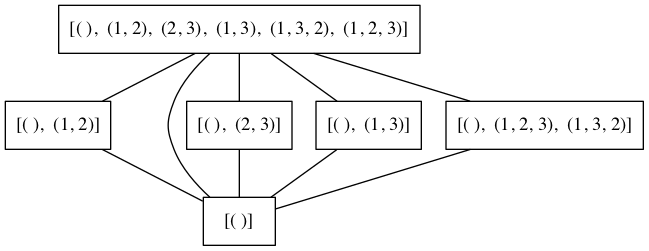

In [70]:
png_str = g1.render()
Image(data=png_str)

Now with $\mathbb{Z}_4\times \mathbb{Z}_3$

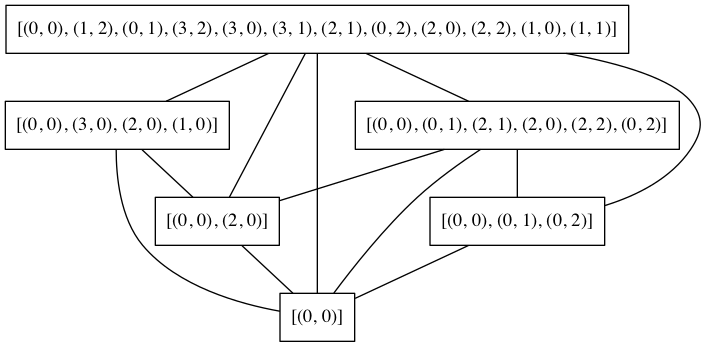

In [71]:
G=CyclicGroup(4).cartesian(CyclicGroup(3))
g1=gv.Graph(format='png')
sbs=Set(G.subgroups())
for g in sbs:
    g1.node(str(list(g)))
edges=[(a,b) for a in sbs for b in sbs if (b <= a) and (a!=b)]
g1.node_attr={'shape':'rectangle',}
for e in edges:
    g1.edge(str(list(e[0])),str(list(e[1])))
png_str = g1.render()
Image(data=png_str)

Or we can draw the Cayley graph of $S_3$ with respect to $(1,2,3)$ and $(2,3)$

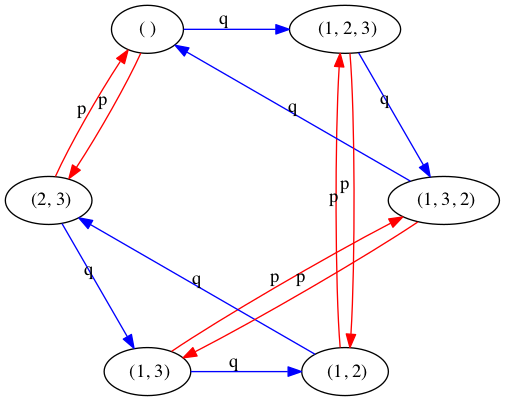

In [72]:
G=SymmetricGroup(3)
g1=gv.Digraph(format='png',engine='circo')
p=G(permutation([1,3,2]))
q=G(permutation([2,3,1]))
vertices=[repr(a) for a in G]
for v in vertices:
    g1.node(v)
edges1=[(repr(a),repr(b)) for a in G for b in G if b==a*p]
for e in edges1:
    g1.edge(e[0],e[1],"p",_attributes={'color':'red'})
edges2=[(repr(a),repr(b)) for a in G for b in G if b==a*q]
for e in edges2:
    g1.edge(e[0],e[1],"q",_attributes={'color':'blue'})
png_str = g1.render()
Image(data=png_str)